In [17]:
from google.colab import drive
drive.mount('/content/drive')
import warnings

# Ignorer les avertissements spécifiques de scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Importation des librairies
import os
import io
import re
import gc
import itertools
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import plotly as pl
import plotly.express as px
import datetime as dt
import functools
import scipy.stats as st
import statsmodels.api as sm
import pyarrow.parquet as pq
import time as time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

import numpy as np
import pandas as pd
import csv

import datetime as dt
from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

from shapely.geometry import LineString

import warnings
# pour afficher 165 colonnes ou lignes minimum
pd.set_option('display.max_column', 100)
pd.set_option('display.max_row', 100)
from math import prod
from sklearn import cluster
from collections import Counter
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, mean_squared_error,  r2_score, silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import shapiro, normaltest, anderson
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import check_random_state, shuffle
%matplotlib inline
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [19]:
import pandas as pd

# Chemin vers le fichier merged_df.csv
csv_path = "/content/drive/MyDrive/openclass/merged_df.csv"

# Importer le fichier CSV dans un DataFrame
df_new = pd.read_csv(csv_path)

# Afficher les premières lignes du DataFrame pour vérification
df_new.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index_order,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_merged_reviews,order_item_id,product_id,seller_id,shipping_limit_date,price,index_reviews,review_id,review_score,index_merged_products,payment_sequential,payment_type,payment_installments,payment_value,index_products,product_photos_qty,product_weight_g,product_length_cm,index_merged_translation,seller_zip_code_prefix,seller_city,seller_state,index_translation,product_category_name_english,commandes_par_clients,montant_cumule,duree_depuis_derniere_commande
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,373,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,24307,88b8b52d46df026a9d1ad2136a59b30b,4,19778,1,credit_card,2,146.87,32209,1.0,8683.0,54.0,1182,8577,itaquaquecetuba,SP,30,office_furniture,1,124.99,474
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,60047,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,85296,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,54657,7fc63200f12eebb5f387856afdd63db8,1,78734,1,credit_card,1,275.79,32209,1.0,8683.0,54.0,1182,8577,itaquaquecetuba,SP,30,office_furniture,1,112.99,297
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,60047,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,85297,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,54657,7fc63200f12eebb5f387856afdd63db8,1,78734,1,credit_card,1,275.79,32209,1.0,8683.0,54.0,1182,8577,itaquaquecetuba,SP,30,office_furniture,1,225.98,297
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,42931,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,78070,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15718,251191809e37c1cffc16865947c18a4d,3,85987,1,credit_card,7,140.61,32209,1.0,8683.0,54.0,1182,8577,itaquaquecetuba,SP,30,office_furniture,1,124.99,483
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,32077,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,20225,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,13278,f7123bac5b91a0e2e38d8b41fd1206f4,4,7819,1,credit_card,10,137.58,32209,1.0,8683.0,54.0,1182,8577,itaquaquecetuba,SP,30,office_furniture,1,106.99,211


In [20]:
df_new.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'index_order', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'index_merged_reviews',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'index_reviews', 'review_id', 'review_score',
       'index_merged_products', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'index_products',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'index_merged_translation', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'index_translation', 'product_category_name_english',
       'commandes_par_clients', 'montant_cumule',
       'duree_depuis_derniere_commande'],
      dtype='object')

In [21]:
# Sélection des colonnes spécifiques
selected_columns = [
     'customer_unique_id', 'customer_city', 'customer_state','payment_value','payment_type',
    'order_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','commandes_par_clients','montant_cumule','duree_depuis_derniere_commande','review_score', 'order_item_id',
   ]

# Création d'un nouveau DataFrame avec les colonnes sélectionnées
df_selected = df_new[selected_columns]

# Stabilité des clusters au cours du temps

In [22]:
# Dataframe de sauvegarde des métriques de stabilité du dataframe
df_resultats_km = pd.DataFrame({})

In [23]:
# Utilisation de copy() pour éviter les avertissements SettingWithCopyWarning
df_selected = df_selected.copy()

In [24]:
df_selected.rename(columns={"order_purchase_timestamp": "purchase_time"}, inplace=True)

In [25]:
df_selected["purchase_time"] = df_selected["purchase_time"].astype('datetime64[ns]')

In [26]:
df_selected

,customer_unique_id,customer_city,customer_state,payment_value,payment_type,order_id,order_status,purchase_time,order_approved_at,order_delivered_carrier_date,commandes_par_clients,montant_cumule,duree_depuis_derniere_commande,review_score,order_item_id
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,146.87,credit_card,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,1,124.99,474,4,1
1,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,275.79,credit_card,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,1,112.99,297,1,1
2,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,275.79,credit_card,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,1,225.98,297,1,2
3,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,140.61,credit_card,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,1,124.99,483,3,1
4,23397e992b09769faf5e66f9e171a241,mage,RJ,137.58,credit_card,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,1,106.99,211,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,96328ac15f58fbb232fe14b182103382,vargem bonita,SC,426.70,credit_card,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,1,389.00,155,4,1
115605,bf5ed75fca98e8f79c49e9a5bf7690e1,limeira,SP,63.25,boleto,28915ae2a90c218f0c2b7f8e0fb280e0,delivered,2017-04-09 20:04:37,2017-04-11 03:45:26,2017-04-12 07:03:58,1,36.99,511,1,2
115606,a490d5875edefe9bb8f5101ec2f6b56f,sao joao da boa vista,SP,160.46,credit_card,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,1,139.00,370,5,1
115607,6968d41eb700f1ea39424e04b854bf7e,belo horizonte,MG,55.18,credit_card,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,1,129.00,398,5,1


In [27]:
# Sélection des colonnes spécifiques
selected_columns = [
     'purchase_time','commandes_par_clients','montant_cumule','duree_depuis_derniere_commande'
   ]

# Création d'un nouveau DataFrame avec les colonnes sélectionnées
rfm_df= df_selected[selected_columns]

# Contrat de maintenance

In [28]:
from dateutil.relativedelta import relativedelta

print(rfm_df['purchase_time'].max())
print(rfm_df['purchase_time'].min())


# Periode initiale
start_date = dt.datetime(2017, 1, 1, 0, 0)
start_T0 = dt.datetime(2018, 1, 1, 0, 0)
mask_F0 = (rfm_df['purchase_time'] > start_date) & (
    rfm_df['purchase_time'] <= start_T0)
data_init = rfm_df.loc[mask_F0].drop(columns='purchase_time')

# Créer le pipeline avec le préprocesseur StandardScaler et le modèle KMeans
kmeans_init = Pipeline([
    ("preprocessor", StandardScaler()),
    ("kmeans", KMeans(init='k-means++', n_clusters=5, n_init=5, max_iter= 100,random_state=19))
])

# Adapter le pipeline aux données
kmeans_init.fit(data_init)

# Obtenir les étiquettes de cluster attribuées à chaque individu
init_labels = kmeans_init.named_steps['kmeans'].labels_

ari_score = []

for p in range(1, 48):
    # Création des datasets par périodes
    start_date = dt.datetime(2017, 1, 1, 0, 0)
    start_T0 = dt.datetime(2018, 1, 1, 0, 0)
    start_date_Tp = start_T0 + relativedelta(days=+7*p)  # Incrémentation de 15 jours
    data_period = rfm_df.copy()
    mask_data_period = (rfm_df['purchase_time'] > start_date) & (
        rfm_df['purchase_time'] <= start_date_Tp)
    data_period = rfm_df.loc[mask_data_period].drop(
        columns='purchase_time')

    # K-Means
    kmeans_p = Pipeline([("preprocessor", StandardScaler()),
                         ("kmeans", KMeans(init='k-means++', n_clusters=5, n_init=5, max_iter= 100,random_state=19))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_

    # Calcul des ARI score
    ari_p = adjusted_rand_score(kmeans_init.predict(
        data_period), kmeans_p.predict(data_period))
    ari_score.append([p, ari_p])

2018-09-03 09:06:57
2016-09-04 21:15:19


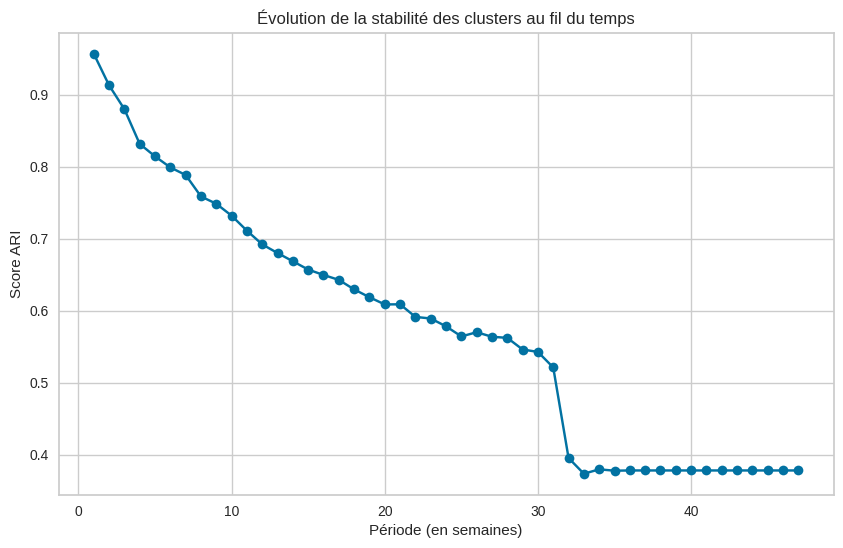

In [29]:
import matplotlib.pyplot as plt

# Convertir la liste de scores ARI en DataFrame
df_ari = pd.DataFrame(ari_score, columns=['Période', 'ARI'])

# Tracer l'évolution du score ARI au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(df_ari['Période'], df_ari['ARI'], marker='o', linestyle='-')
plt.title('Évolution de la stabilité des clusters au fil du temps')
plt.xlabel('Période (en semaines)')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()


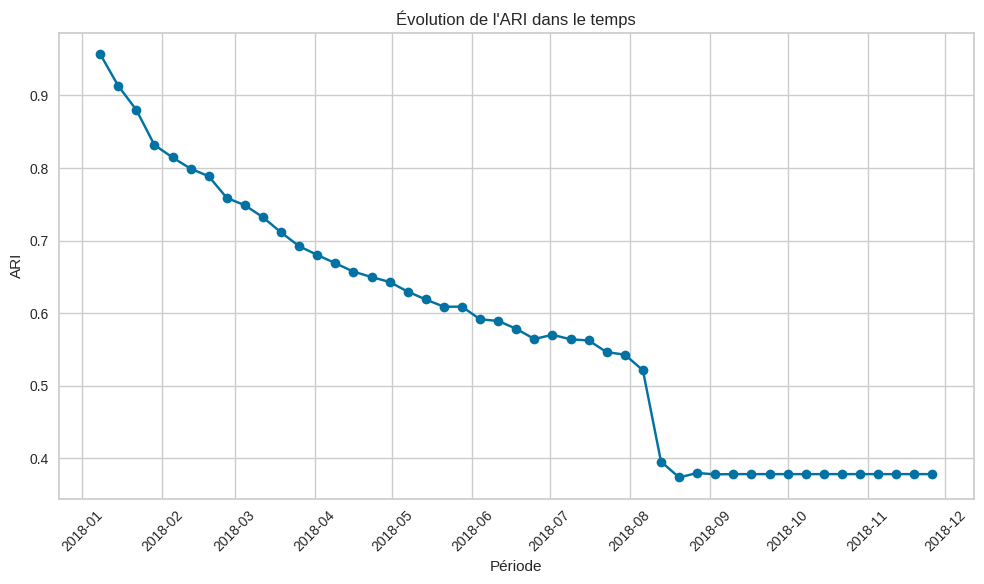

In [30]:
import matplotlib.pyplot as plt
import datetime as dt

# Convertir les numéros de période en dates
dates = [start_T0 + relativedelta(days=7 * p) for p in range(1, 48)]

# Récupérer les valeurs d'ARI
periodes = [x[0] for x in ari_score]
ari_values = [x[1] for x in ari_score]

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(dates, ari_values, marker='o', linestyle='-')
plt.title("Évolution de l'ARI dans le temps")
plt.xlabel("Période")
plt.ylabel("ARI")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


L'ARI (Adjusted Rand Index) est une mesure de similarité entre deux ensembles de clusters. Il est utilisé pour évaluer la qualité d'un algorithme de clustering en comparant les regroupements qu'il produit avec des regroupements de référence, souvent considérés comme "vrais" ou "corrects".

L'ARI est une mesure comprise entre -1 et 1, où :

1 indique une correspondance parfaite entre les clusters produits par l'algorithme et les clusters de référence.
0 indique que les clusters produits sont équivalents à ce que l'on obtiendrait au hasard.
-1 indique une discordance totale entre les clusters produits et les clusters de référence.
En général, plus l'ARI est proche de 1, meilleure est la qualité du clustering. L'ARI est particulièrement utile lorsque les noms des clusters produits par l'algorithme de clustering ne correspondent pas aux noms des clusters de référence, car il ne tient pas compte de l'étiquetage spécifique des clusters.